In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

### 1. Load the original image

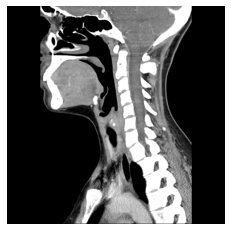

In [4]:
normal_img = cv2.imread('normal-ct-of-the-neck.jpg', 0)
## disable x & y axis
plt.axis('off')
plt.imshow(normal_img, cmap='gray', vmin=normal_img.min(), vmax=normal_img.max())

### 2. Smooth image using gaussian filter

In [6]:
smoothed_img = cv2.GaussianBlur(normal_img,(5,5),0)

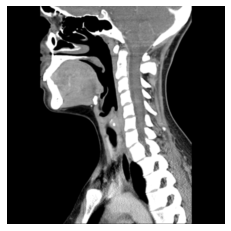

In [8]:
## disable x & y axis
plt.axis('off')
plt.imshow(smoothed_img, cmap='gray', vmin=smoothed_img.min(), vmax=smoothed_img.max())

### 3. Apply Sobel and Prewitt kernels

#### Sobel

In [10]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

In [40]:
sobel_x = cv2.Sobel(smoothed_img, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
sobel_y = cv2.Sobel(smoothed_img, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_sobel_x = cv2.convertScaleAbs(sobel_x)
abs_sobel_y = cv2.convertScaleAbs(sobel_y)

sobel_grad = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

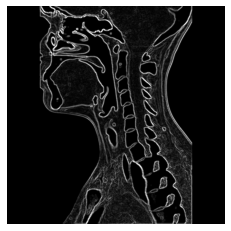

In [41]:
## disable x & y axis
plt.axis('off')
plt.imshow(sobel_grad, cmap='gray', vmin=sobel_grad.min(), vmax=sobel_grad.max())

In [42]:
### Thresholding
ret, th_sobel_img = cv2.threshold(sobel_grad, 100, 255, cv2.THRESH_BINARY)

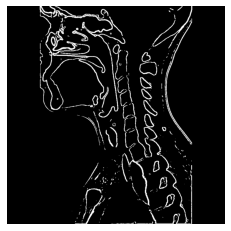

In [43]:
## disable x & y axis
plt.axis('off')
plt.imshow(th_sobel_img, cmap='gray', vmin=th_sobel_img.min(), vmax=th_sobel_img.max())

#### Prewitt

In [44]:
kernel_x = np.array([[1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])

kernel_y = np.array([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])

prewitt_x = cv2.filter2D(smoothed_img, -1, kernel_x)
prewitt_y = cv2.filter2D(smoothed_img, -1, kernel_y)

prewitt_grad = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)

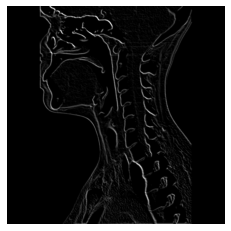

In [46]:
## disable x & y axis
plt.axis('off')
plt.imshow(prewitt_grad, cmap='gray', vmin=th_sobel_img.min(), vmax=th_sobel_img.max())